In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn import tree

#Loading the iris data
data = load_iris()
print('Classes to predict: ', data.target_names)
print('Features: ', data.feature_names)


Classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:

import pandas as pd
iris = pd.DataFrame(data.data)
print(iris.head())

iris.columns = data.feature_names
iris.head()


     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris['class'] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
#Extracting data attributes
X = iris.iloc[:,0:4]
### Extracting target/ class labels
y = iris.iloc[:,4] 

print('Number of examples in the data:', X.shape)

#First four rows in the variable 'X'
print(X[:4])
y.head(4)


Number of examples in the data: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2


0    0
1    0
2    0
3    0
Name: class, dtype: int32

In [65]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, train_size = 0.8)

clf = KNeighborsClassifier(n_neighbors = 7,algorithm='kd_tree',weights='distance')

#clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)
  
y_pred = clf.predict(X_test)

In [66]:


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [67]:
from sklearn.metrics import accuracy_score
k_range = range(1,20)
score_list = []
score = {}
  
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    y_pred = clf.predict(X_test)
    score[k] = accuracy_score(y_pred,y_test)
    score_list.append(accuracy_score(y_pred,y_test))
print(score_list)
    

[0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Test Accuracy')

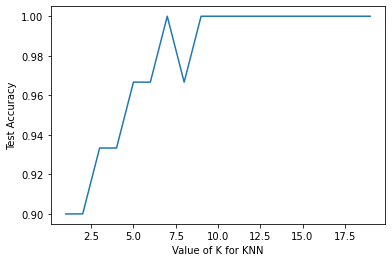

In [68]:
#plot k_range
plt.plot(k_range,score_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')

In [69]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, train_size = 0.8)

clf = KNeighborsClassifier(n_neighbors = 7,weights='distance')

#clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)
  
y_pred = clf.predict(X_test)

In [60]:


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

